# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:
print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)
print(x_test.shape)

(50000, 32, 32, 3)
4
uint8
(10000, 32, 32, 3)


In [3]:
print (y_test.shape)
print (y_test.ndim)
print (y_test.dtype)
print (y_train.shape)
print (y_train.ndim)
print (y_train.dtype)

(10000, 1)
2
uint8
(50000, 1)
2
uint8


In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()


In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [7]:

print(x_train[0])
print(x_test[0])
print(x_test[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ..

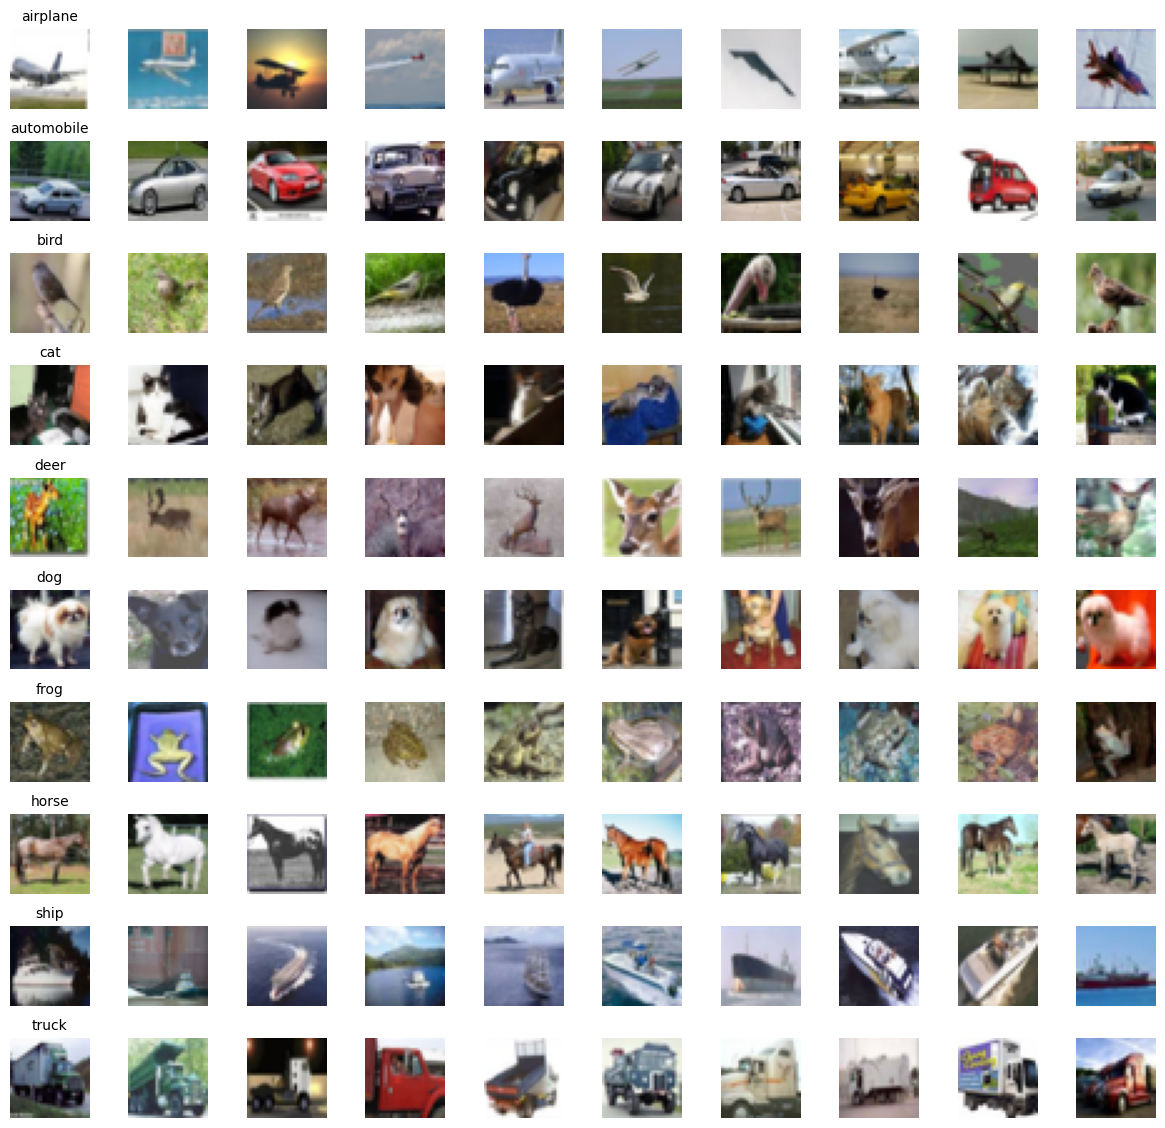

In [8]:
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

y_labels = np.argmax(y_train, axis=1)

# Plot 10x10 grid
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# For each class (0 to 9)
for class_id in range(10):
    # Get all indices of that class
    idxs = np.where(y_labels == class_id)[0]
    # Choose 10 random samples from that class
    selected_idxs = np.random.choice(idxs, 10, replace=False)

    for i in range(10):
        ax = axes[class_id, i]
        ax.imshow(x_train[selected_idxs[i]])
        ax.axis('off')
        if i == 0:
            ax.set_title(class_names[class_id], fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [9]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [10]:
from keras.backend import clear_session
clear_session()

In [25]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    # Convolutional layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),

    # Max pooling layer
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps to 1D
    Flatten(),

    # Dense hidden layer
    Dense(100, activation='relu'),

    # Output layer (for 10 classes)
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam

# model = Sequential([
#     # Block 1
#     Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
#     BatchNormalization(),
#     Conv2D(32, (3, 3), padding='same', activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),

#     # Block 2
#     Conv2D(64, (3, 3), padding='same', activation='relu'),
#     BatchNormalization(),
#     Conv2D(64, (3, 3), padding='same', activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),

#     # Global pooling
#     GlobalAveragePooling2D(),

#     # Dense layer
#     Dense(100, activation='relu'),
#     Dropout(0.5),

#     # Output layer
#     Dense(10, activation='softmax')
# ])


In [26]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

In [29]:
# history = model.fit(x_train, y_train, batch_size=10, epochs=5)
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.1310 - loss: 2.2842 - val_accuracy: 0.2086 - val_loss: 2.1924
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2351 - loss: 2.1628 - val_accuracy: 0.2694 - val_loss: 2.0745
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2791 - loss: 2.0485 - val_accuracy: 0.2924 - val_loss: 1.9926
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3104 - loss: 1.9724 - val_accuracy: 0.3094 - val_loss: 1.9434
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3268 - loss: 1.9178 - val_accuracy: 0.3298 - val_loss: 1.9042
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3400 - loss: 1.8939 - val_accuracy: 0.3460 - val_loss: 1.8800
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3504 - loss: 1.8648 - val_accuracy: 0.3500 - val_loss: 1.8563
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3580 - loss: 1.8391 - val_accuracy: 0.3550 - val_l

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt

# # Define the model (use the improved version we discussed)
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Add early stopping callback
# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # Train the model
# history = model.fit(x_train, y_train,
#                     epochs=50,
#                     batch_size=64,
#                     validation_split=0.1,
#                     callbacks=[early_stop],
#                     verbose=1)


*   Plot the cross entropy loss curve and the accuracy curve

In [30]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


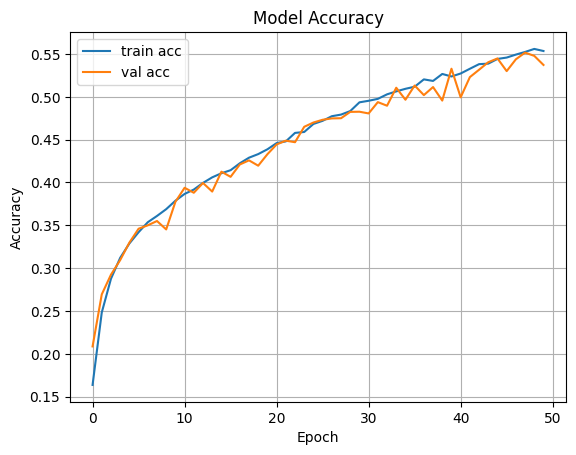

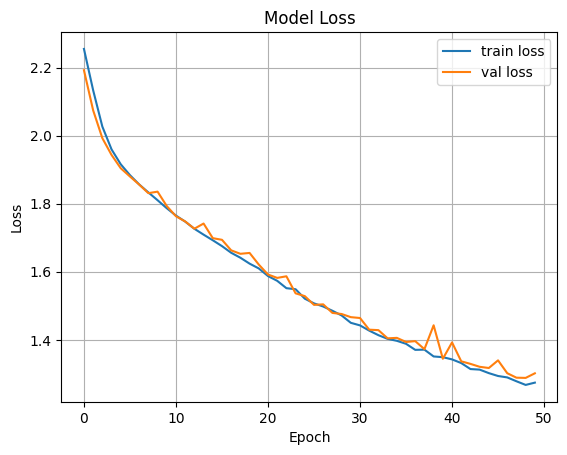

In [31]:
import matplotlib.pyplot as plt
# Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess the CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the VGG-inspired model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Use softmax activation in the output layer for multi-class classification
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

# Train the model
historyVGG = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.1569 - loss: 2.2676 - val_accuracy: 0.2441 - val_loss: 2.1423
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2627 - loss: 2.1013 - val_accuracy: 0.2958 - val_loss: 1.9862
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2935 - loss: 1.9888 - val_accuracy: 0.3259 - val_loss: 1.9055
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3275 - loss: 1.9170 - val_accuracy: 0.3386 - val_loss: 1.8789
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3452 - loss: 1.8513 - val_accuracy: 0.3484 - val_loss: 1.8353
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3647 - loss: 1.8015 - val_accuracy: 0.3782 - val_loss: 1.7617
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3816 - loss: 1.7601 - val_accuracy: 0.3762 - val_loss: 1.7397
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3888 - loss: 1.7322 - val_accuracy: 0.3945 - v

In [33]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,140 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [35]:
print(historyVGG.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


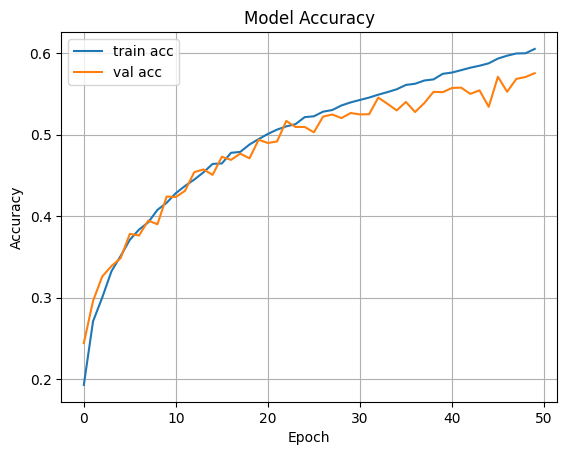

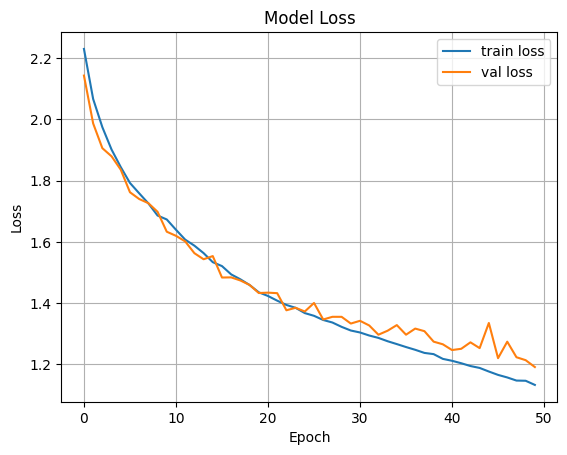

In [36]:
import matplotlib.pyplot as plt
# Accuracy
plt.plot(historyVGG.history['accuracy'], label='train acc')
plt.plot(historyVGG.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss
plt.plot(historyVGG.history['loss'], label='train loss')
plt.plot(historyVGG.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

Performance of Deeper Level is a little better

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


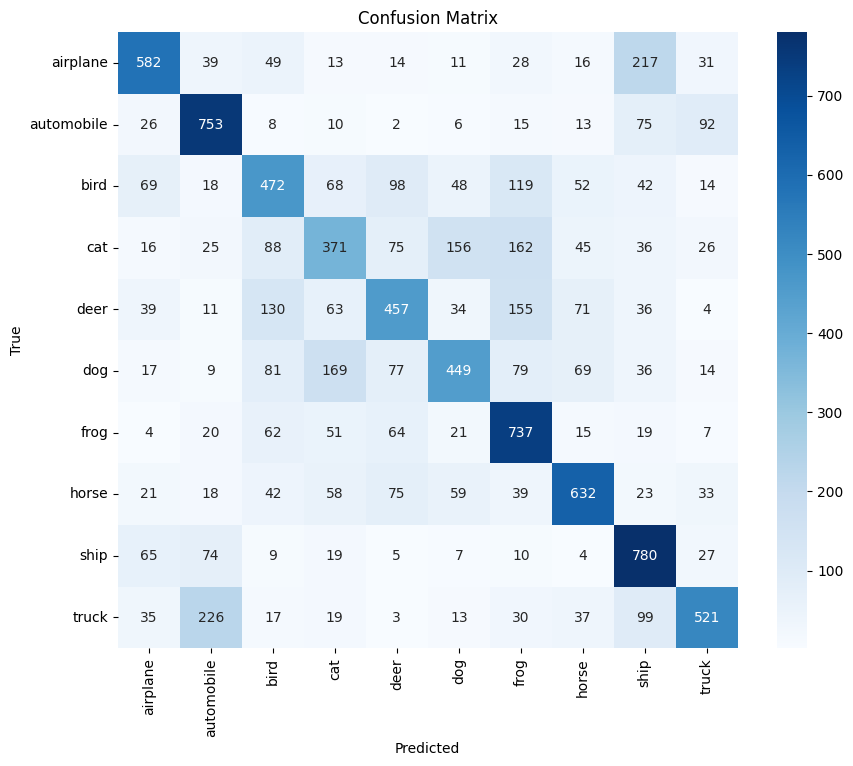

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Predict
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# # Report
# print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [42]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy:.2f}')

Test Accuracy: 0.58


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [43]:
# Load and preprocess the CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Resize images to 64x64
x_train = np.array([tf.image.resize(image, (64, 64)).numpy() for image in x_train])
x_test = np.array([tf.image.resize(image, (64, 64)).numpy() for image in x_test])

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the VGG-inspired model
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Use softmax activation in the output layer for multi-class classification
])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [44]:
# Compile the model
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = ['accuracy'])

# Train the model
historyVGG2 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 118s 831ms/step - accuracy: 0.1150 - loss: 2.3015 - val_accuracy: 0.1030 - val_loss: 2.2971
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 382ms/step - accuracy: 0.1052 - loss: 2.2944 - val_accuracy: 0.1131 - val_loss: 2.2819
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 378ms/step - accuracy: 0.1320 - loss: 2.2702 - val_accuracy: 0.1934 - val_loss: 2.1924
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 382ms/step - accuracy: 0.2161 - loss: 2.1580 - val_accuracy: 0.2391 - val_loss: 2.1035
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 380ms/step - accuracy: 0.2499 - loss: 2.0749 - val_accuracy: 0.3091 - val_loss: 1.9517
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 383ms/step - accuracy: 0.2927 - loss: 1.9903 - val_accuracy: 0.3122 - val_loss: 1.9092
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 381ms/step - accuracy: 0.3223 - loss: 1.9209 - val_accuracy: 0.3654 - val_loss: 1.8033
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 381ms/step - accuracy: 0.3476 - loss: 1.8347 - val_acc

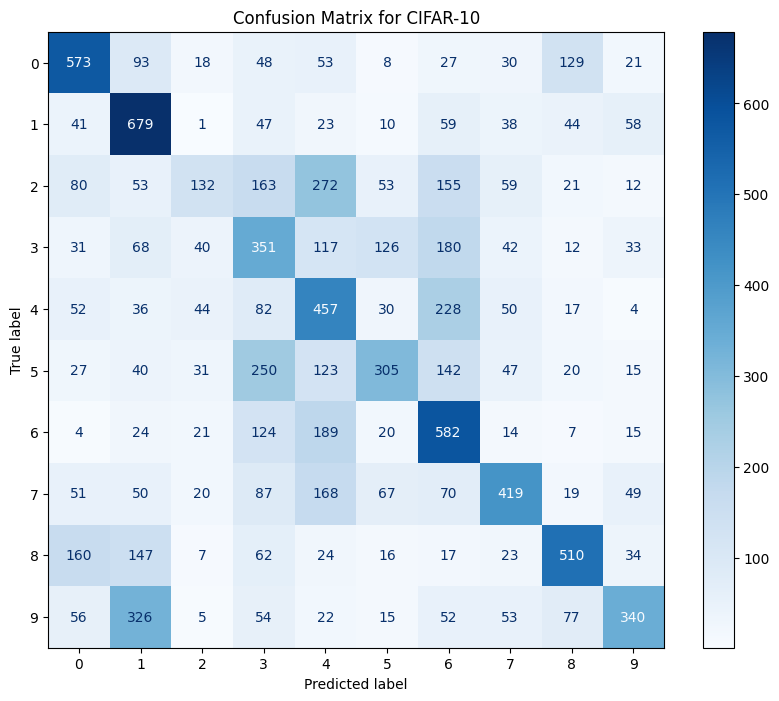

In [45]:
# Predict the classes for the test set
y_pred_probs = model.predict(x_test, verbose=0)  # Get the predicted probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices

# Convert true labels from one-hot encoded form to single values
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix for CIFAR-10')
plt.show()

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:


Non-Linearity:

Activation functions create non-linear decision boundaries, allowing the network to learn complex patterns. Without them, a neural network would simply behave like a linear regression model, regardless of its depth.

Signal Transformation:

They transform the input signal into an output signal within a specified range, providing the necessary control over what kind of signal flows through the network.

Enable Deep Networks:

By stacking layers with non-linear activations, networks can represent complex mappings between input and output data, a requirement for deep learning applications.

_

2 - Key Differences between sigmoid and softmax:

Sigmoid Activation:

Formula: ( \sigma(x) = \frac{1}{1 + e^{-x}} )
Output Range: (0, 1)
Properties: Suitable for binary classification problems. Can cause issues such as vanishing gradients in deep networks due to saturation.
Use Case: Commonly used in the output layer for binary classification tasks to represent probabilities.

Softmax Activation:

Formula: ( \text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}} )
Output Range: (0, 1) with all outputs summing to 1
Properties: Used for multi-class classification, transforms logits into probabilities where the highest value corresponds to the predicted class.
Use Case: Typically used in the final layer of a network for multi-class classification tasks, enabling the network to assign probabilities to each class.

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Categorical Crossentropy:

Use: Multiclass classification problems where classes are mutually exclusive.
Input: One-hot encoded labels and predicted probabilities from softmax.
Formula: (- \sum_{i=1}^{C} y_i \cdot \log(\hat{y}_i)) where (C) is the number of classes, (y_i) is the true label for class (i), and (\hat{y}_i) is the predicted probability.

Binary Crossentropy:

Use: Binary classification problems.
Input: Binary labels and predicted probabilities from sigmoid.
_
